<img src="../img/devacademy_logo.png" alt="Linkage comparison" style="width: 600px;"/>


# Introducción a métodos de clustering

## Entorno de trabajo

In [3]:
import sys
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import scipy
import plotly

print(f"Python: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"plotly: {plotly.__version__}")
print(f"scikit-learn: {sklearn.__version__}")

Python: 3.8.10 (default, May 19 2021, 18:05:58) 
[GCC 7.3.0]
numpy: 1.20.2
pandas: 1.2.4
scipy: 1.6.0
matplotlib: 3.2.0
seaborn: 0.11.1
plotly: 4.14.3
scikit-learn: 0.24.2


### scikit-learn

Scikit-learn (http://scikit-learn.org/stable/) es una librería construida a partir de Numpy, Matplotlib y Scipy que implementa la mayoría de algoritmos de aprendizaje automático.

  * Guía de usuario: http://scikit-learn.org/stable/user_guide.html
  * Referencia API: https://scikit-learn.org/stable/modules/classes.html

Dentro de scikit-learn existen varios módulos principales que vamos a resumir en dos grupos:

  1. Preproceso, evaluación y utilidades:
    * `sklearn.datasets`: utilidades para cargar conjuntos de datos de formatos comunes y distintas webs populares
    preprocessing
    * `sklearn.feature_selection`: algoritmos de selección de variables
    * `sklearn.feature_extraction`: extraer variables de imágenes y texto
    * `sklearn.impute`: estrategias para imputar valores que faltan
    * `sklearn.metrics`: métricas para evaluar modelos
    * `sklearn.model_selection`: estrategias para evaluar el rendimiento de los modelos y selección de hyper-parámetros 
    

  2. Modelos
    * `sklearn.linear_model`: modelos lineales, por ejemplo regresión lineal o regresión logística
    * `sklearn.neighbours`: vecinos próximos (KNN)
    * `sklearn.neural_network`: redes neuronales no profundas
    * `sklearn.ensemble`: modelos de emsemble, por ejemplo *random forest* o *gradient boosting*
    * `sklearn.svm`: máquinas de vectores de soporte, tanto para regresión como para clasificación
    * `sklearn.tree`: árboles de decisión
    * `sklearn.cluster`: modelos de clustering

## Aprendizaje supervisado

Tenemos disponibles pares de variables ($X$) y salidas ($y$) con los que se entrena un modelo

<img src=../img/supervised-ml-workflow.png width=600>

Todos los estimadores de scikit-learn para realizar aprendizaje supervisado comparten la misma API, por lo que cuentan como **mínimo**:

   * `fit(X_train, y_train)`: ajusta el modelo con los datos de entrenamiento
   * `predict(X_test)`: obtiene las predicciones del modelo, una vez ajustado
   * `score(X_test, y_test)`: evalúa el modelo usando la métrica por defecto
   
Esto hace que cambiar el modelo que estamos ajustando sea muy sencillo

## Aprendizaje no supervisado

- Solo las variables están disponibles, pero **no** las salidas

- No se puede calcular el error cometido por el modelo

- El objetivo es intentar encontrar *patrones* en los datos de forma automática

Por tanto, a pesar de que la API de scikit-learn cuente con los mismos métodos:

   * `fit(X_train, y_train)`: ajusta el modelo con los datos de entrenamiento
   * `predict(X_test)`: obtiene las predicciones del modelo, una vez ajustado
   * `score(X_test, y_test)`: evalúa el modelo usando la métrica por defecto
   
En aprendizaje supervisado no tenemos las salida (`y_train` e `y_test`) disponibles, por lo que simplemente se ignoran y no es necesario pasárselas a las funciones.

## Carga de datos

In [2]:
from sklearn.datasets import fetch_openml
blood = fetch_openml('blood-transfusion-service-center')
print(blood.DESCR)

**Author**: Prof. I-Cheng Yeh  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  
**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   

**Blood Transfusion Service Center Data Set**  
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. 

### Attribute Information  
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total bl

<img src=https://amueller.github.io/ml-workshop-1-of-4/slides/images/matrix-representation.png width=600>

[](https://amueller.github.io/ml-workshop-1-of-4/slides/images/matrix-representation.png)

In [3]:
blood.data

,V1,V2,V3,V4
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,1.0,16.0,4000.0,35.0
3,2.0,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0
...,...,...,...,...
743,23.0,2.0,500.0,38.0
744,21.0,2.0,500.0,52.0
745,23.0,3.0,750.0,62.0
746,39.0,1.0,250.0,39.0


In [4]:
blood.data.shape

(748, 4)

In [5]:
blood.target

0      2
1      2
2      2
3      2
4      1
      ..
743    1
744    1
745    1
746    1
747    1
Name: Class, Length: 748, dtype: category
Categories (2, object): ['1', '2']

In [6]:
blood.target.shape

(748,)

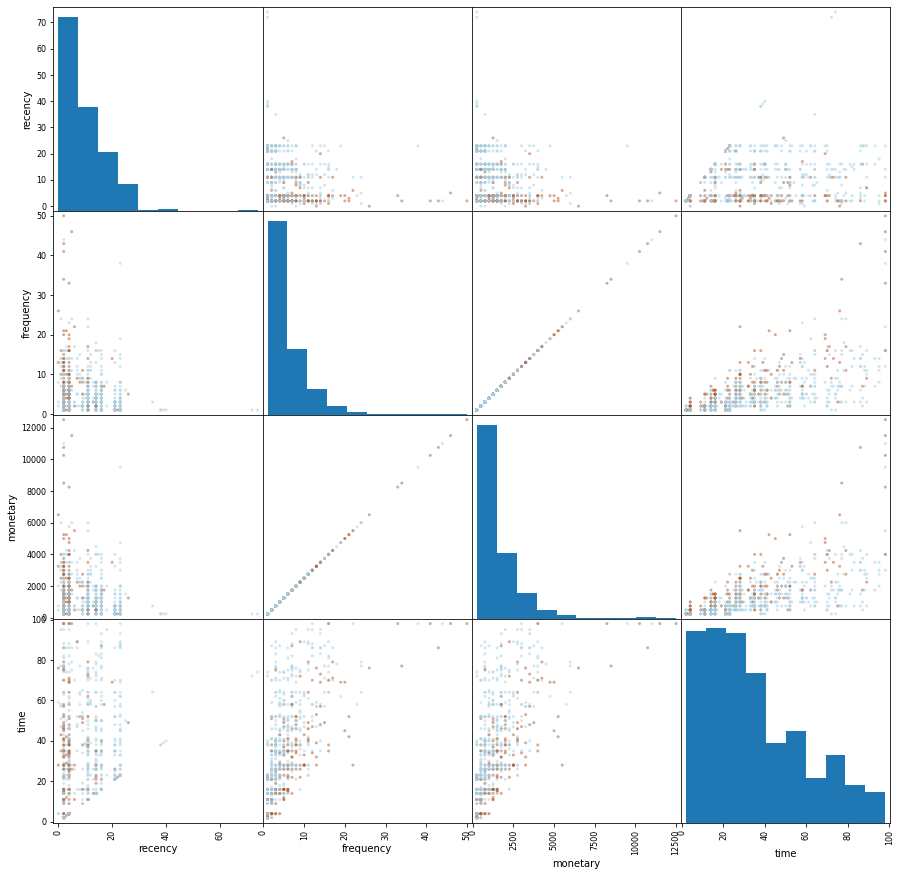

In [7]:
import pandas as pd
X = blood.data
X.columns=['recency', 'frequency', 'monetary', 'time']
y = blood.target == '2'
pd.plotting.scatter_matrix(X, c=y, cmap='Paired', figsize=(15, 15));

### Ejercicios

#### Ejercicio 1

Carga el conjunto de datos `iris` del módulo `sklearn.datasets` usando la función `load_iris`:

   1. Cual es el número de clases, características, y observaciones?
   
   2. Ver información contenida en el atributo `DESCR`
   
   3. Dividir los datos en entrenamiento y test

#### Ejercicio 2

Si cargamos un conjunto de datos propio, generalmente los datos no están en ese formato. Cargar el fichero `iris.csv` de la carpeta `/data` en Python usando `pd.read_csv`:

   1. Realizar gráficos de dispersión emparejados (opcional: ahora usando la función `sns.pairplot`, librería `seaborn`)

   2. Separar las variables de la etiqueta (columna `variety`)